# Predicting ICO Success: A Machine Learning Approach to Analyzing Blockchain Fundraising Outcomes

The digital finance landscape is rapidly evolving, with Initial Coin Offerings (ICOs) emerging as a significant innovation. Unlike traditional fundraising methods, ICOs leverage blockchain technology to offer digital tokens to global investors, providing a new avenue for capital. The popularity of ICOs surged, raising $5.6 billion in 2017 alone, outpacing venture capital investments in blockchain (ICOData, 2018). 

However, ICO success varies widely. Campaigns typically aim to raise between $10 million and $50 million within 30 to 60 days, making it crucial for companies to understand the factors influencing ICO success. 

This report addresses predicting ICO outcomes using machine learning techniques. We analyze a dataset containing detailed ICO project information, including project specifics, team size, token details, and community engagement. Our goal is to develop models that forecast ICO success based on this comprehensive dataset.

## Data Preparation

In this analysis, we start by importing the dataset and focusing on relevant features by removing non-essential columns, such as 'brandSlogan', 'ID', and 'priceUSD'. We then create new variables, including the ICO duration, calculated from 'startDate' and 'endDate'. Missing values in key columns are handled by replacing them with the mean of respective columns. To better understand the data, we use Autoviz for visualizing data relationships and guiding feature selection.

## Modeling

Various machine learning algorithms are applied to predict ICO success, including:

- **Logistic Regression**
- **K Neighbors Classifier**
- **Support Vector Machines**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **AdaBoost Classifier**
- **Gradient Boosting Classifier**
- **XGBoost Classifier**

In [1]:
pip install autoviz

  Obtaining dependency information for autoviz from https://files.pythonhosted.org/packages/ba/7a/9a0074881fb968fdc344e96cf3b1135e85719a257773f0ebe7ae2579d4cc/autoviz-0.1.904-py3-none-any.whl.metadata
  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/bd/48/508a980e9c9f12dbc2e45e57f027abdd92320e5be37c5c551588a86acb48/emoji-2.11.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyamg from https://files.pythonhosted.org/packages/59/7c/cb1a415427fe24cef931f323ec0c8a5d10fc54f8e7bd3e0bb64bcfcc928c/pyamg-5.1.0-cp311-cp311-m

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("/Users/crishnagarkar/Documents/R STATS/ml in practice/LUBS5990M_courseworkData_2324.csv")
data

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,509999,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,225000000,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5000000000,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,01/10/2019,15/12/2019,27.0,1,1,Separate blockchain,125000000,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5000000000,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,2763,N,Helping the adoption of cryptocurrency,0,1.0,1.00,USA,02/12/2017,31/12/2017,NaN,0,0,Ethereum,800000000,0,0.80
2763,2764,N,The Adult Industry Crypto,0,1.0,0.30,Indonesia,15/09/2017,31/10/2017,NaN,0,0,Ethereum,100000000,0,0.20
2764,2765,Y,"Fast, cheap, scalable token transfers",1,2.0,0.67,Germany,18/10/2017,01/11/2017,NaN,1,1,Ethereum,50000000,0,0.50
2765,2766,N,CarVDB Blockchain Platform,0,1.8,0.33,Bulgaria,01/04/2018,11/06/2018,NaN,0,0,Ethereum,49978560,1,0.50


In [4]:
data.dtypes

ID                         int64
success                   object
brandSlogan               object
hasVideo                   int64
rating                   float64
priceUSD                 float64
countryRegion             object
startDate                 object
endDate                   object
teamSize                 float64
hasGithub                  int64
hasReddit                  int64
platform                  object
coinNum                    int64
minInvestment              int64
distributedPercentage    float64
dtype: object

In [5]:
data=data.drop(['brandSlogan','ID', 'priceUSD'],axis=1)

In [99]:
data['startDate']=pd.to_datetime(data['startDate'])

In [100]:
data['endDate']=pd.to_datetime(data['endDate'])

In [101]:
data['duration']=data['enddate']-data['startdate']

In [102]:
import datetime as dt

In [103]:
data['duration'] = data['duration'].dt.days

In [104]:
data['duration']=data['duration'].abs()

In [105]:
data.drop_duplicates(inplace=True)

In [106]:
data.isnull().sum()

success                0
tokenNum             247
teamSize               0
country                0
categories             0
overallrating          0
offered_ownership    541
enddate                0
startdate              5
platform             131
acceptingCurrency    227
softcap               29
hardcap               29
whitepaper            29
video                 29
socialMedia           29
duration               5
dtype: int64

In [107]:
tokenNum_value=data['tokenNum'].mean()
softcap_value=data['softcap'].mean()
hardcap_value=data['hardcap'].mean()
whitepaper_value=data['whitepaper'].mean()
video_value=data['video'].mean()
socialMedia_value=data['socialMedia'].mean()

data['tokenNum'].fillna(value=tokenNum_value, inplace=True)
data['softcap'].fillna(value=softcap_value, inplace=True)
data['hardcap'].fillna(value=hardcap_value, inplace=True)
data['whitepaper'].fillna(value=whitepaper_value, inplace=True)
data['video'].fillna(value=video_value, inplace=True)
data['socialMedia'].fillna(value=socialMedia_value, inplace=True)

In [108]:
data.isnull().sum()

success                0
tokenNum               0
teamSize               0
country                0
categories             0
overallrating          0
offered_ownership    541
enddate                0
startdate              5
platform             131
acceptingCurrency    227
softcap                0
hardcap                0
whitepaper             0
video                  0
socialMedia            0
duration               5
dtype: int64

Visualizing data

Shape of your Data Set loaded: (1606, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        6 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


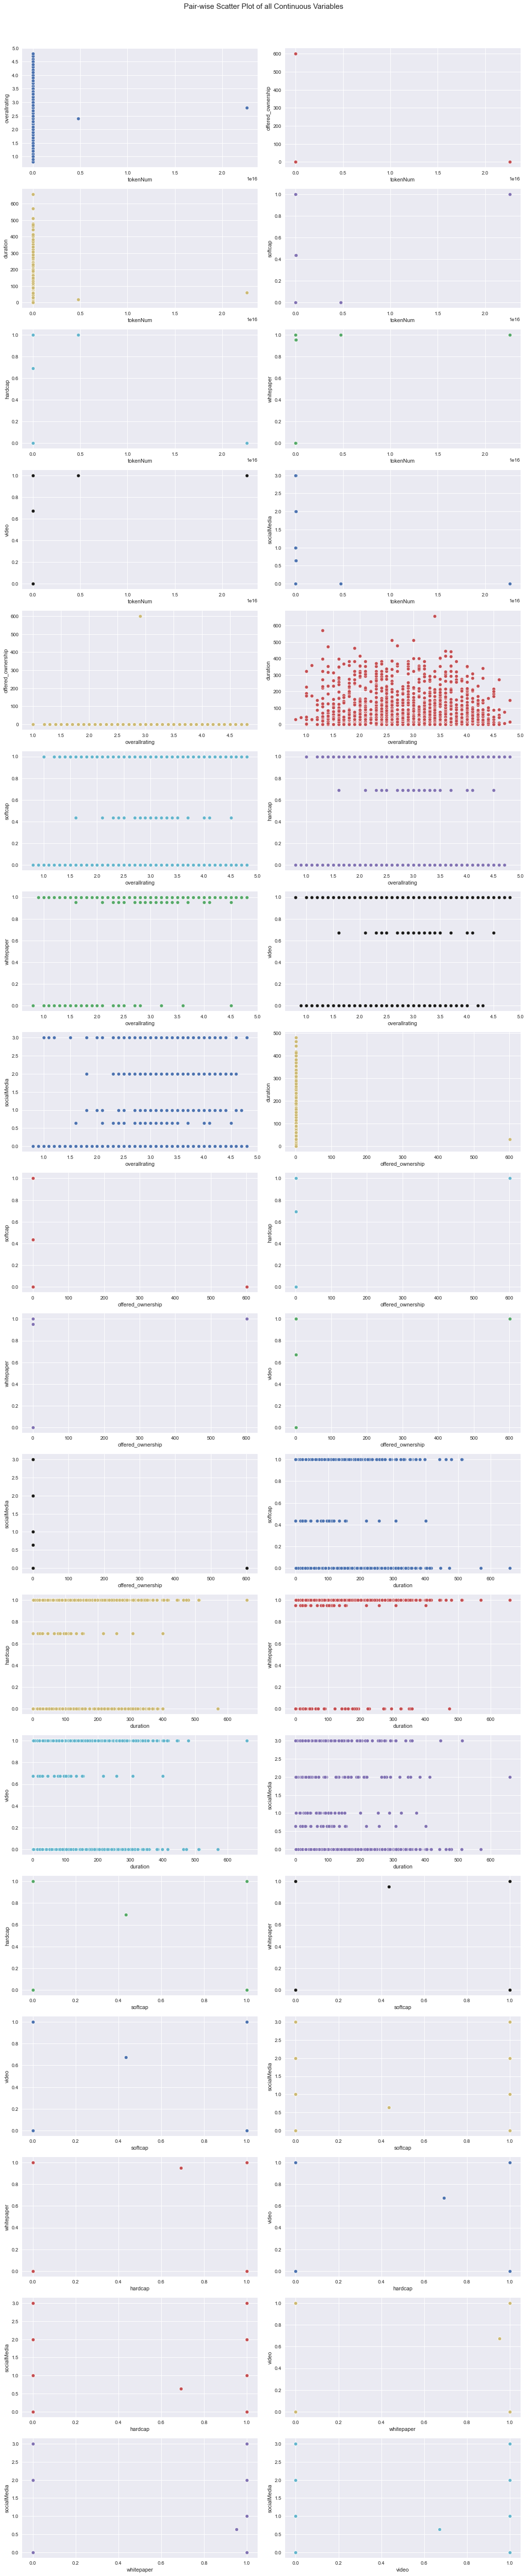

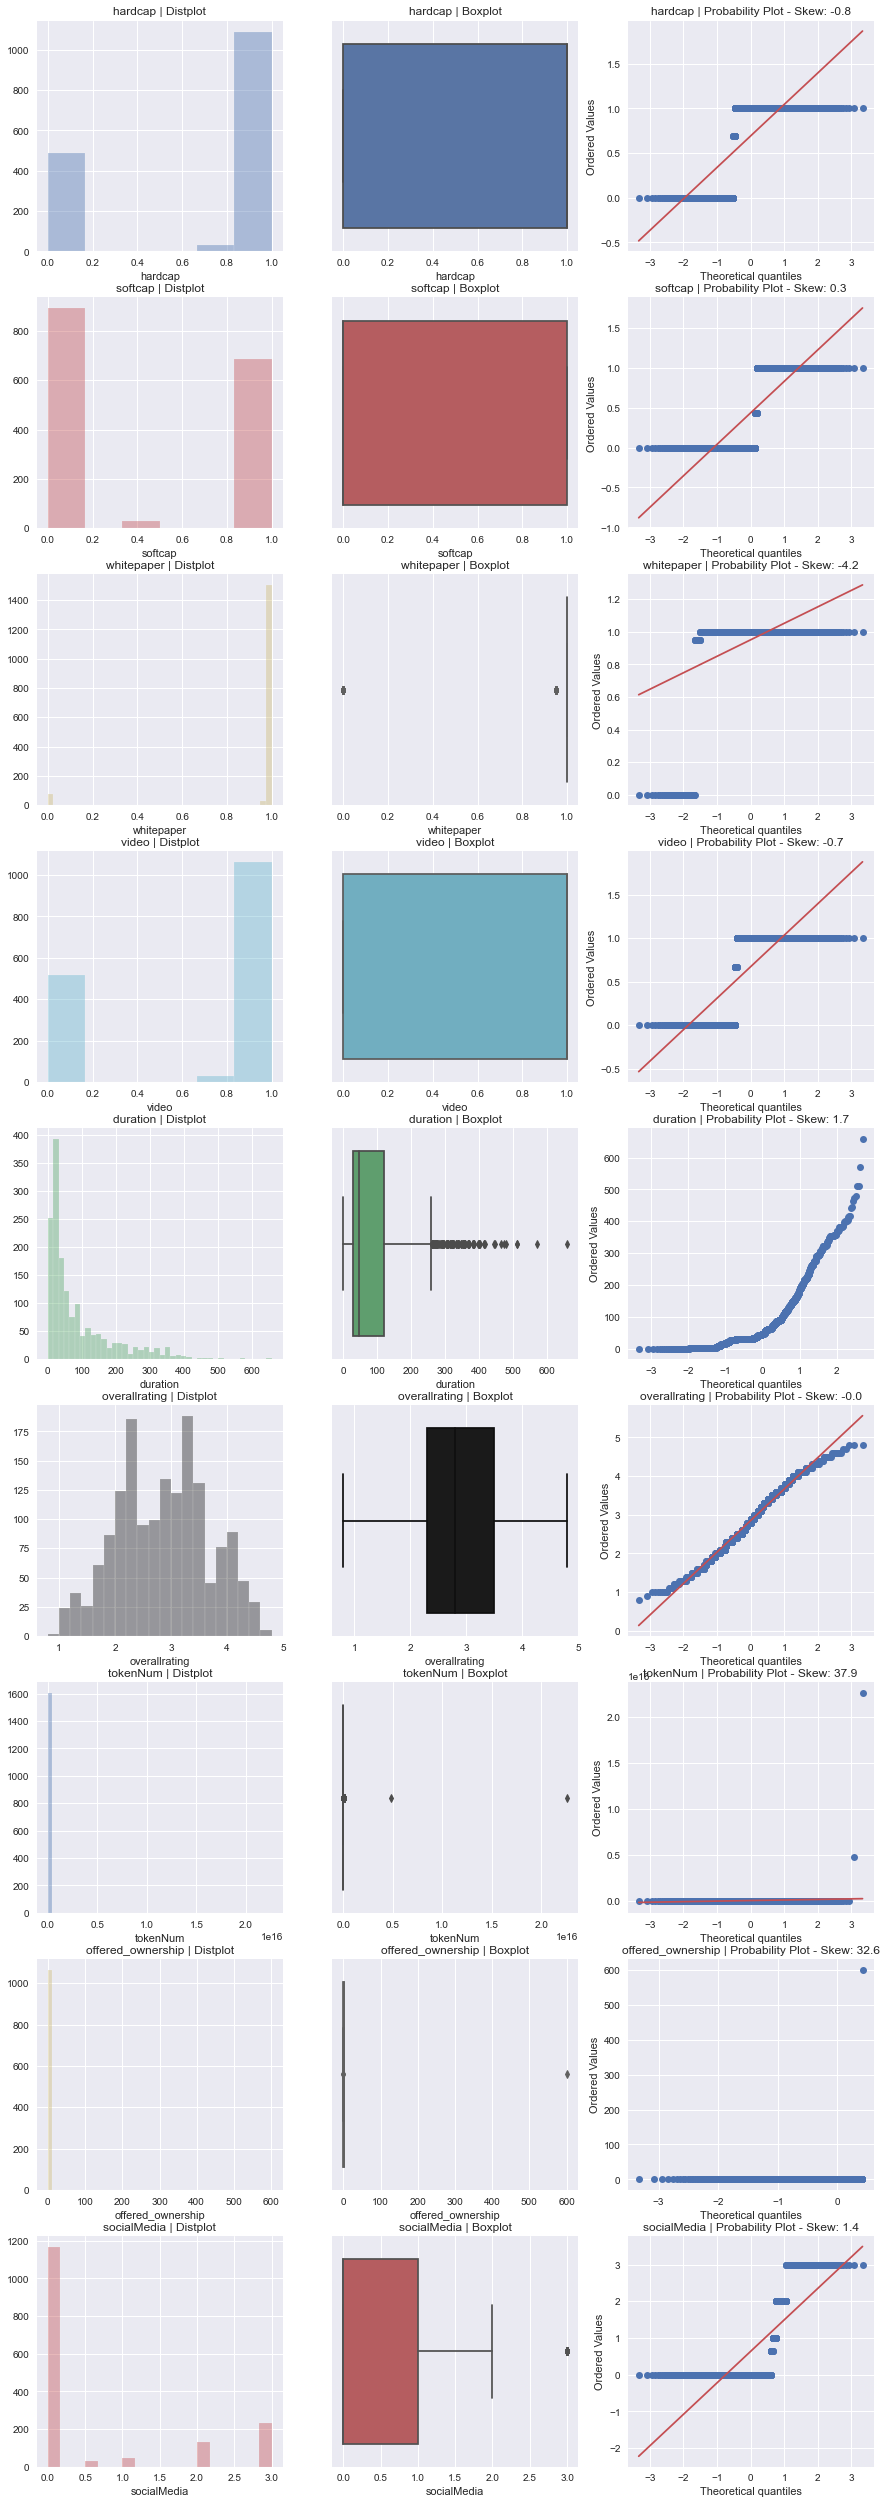

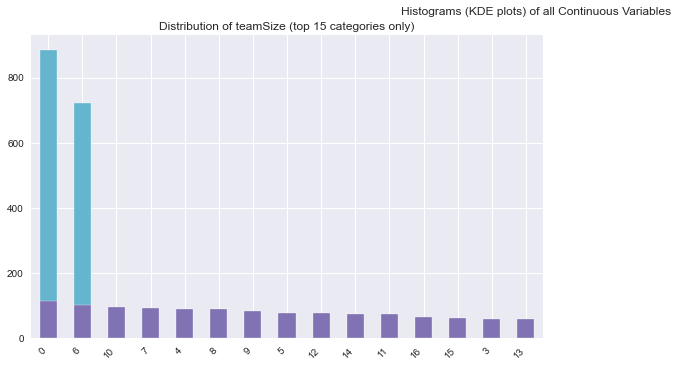

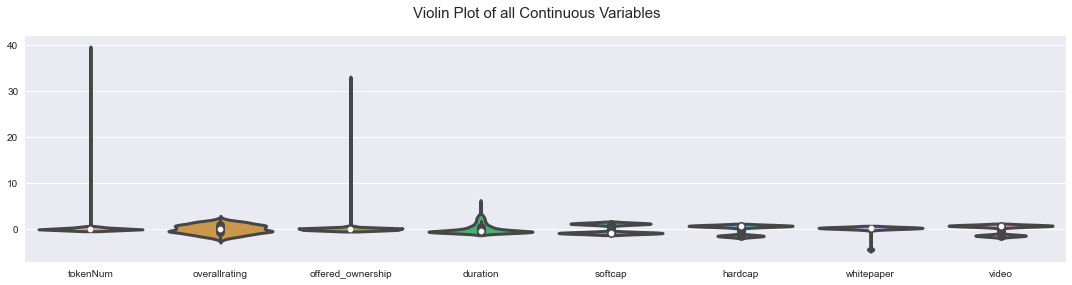

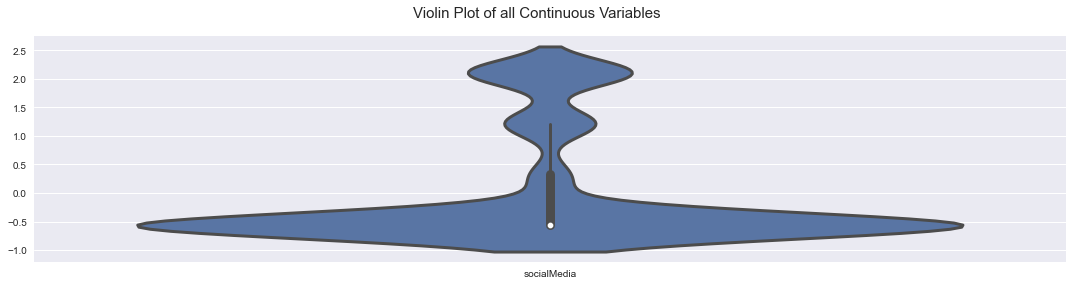

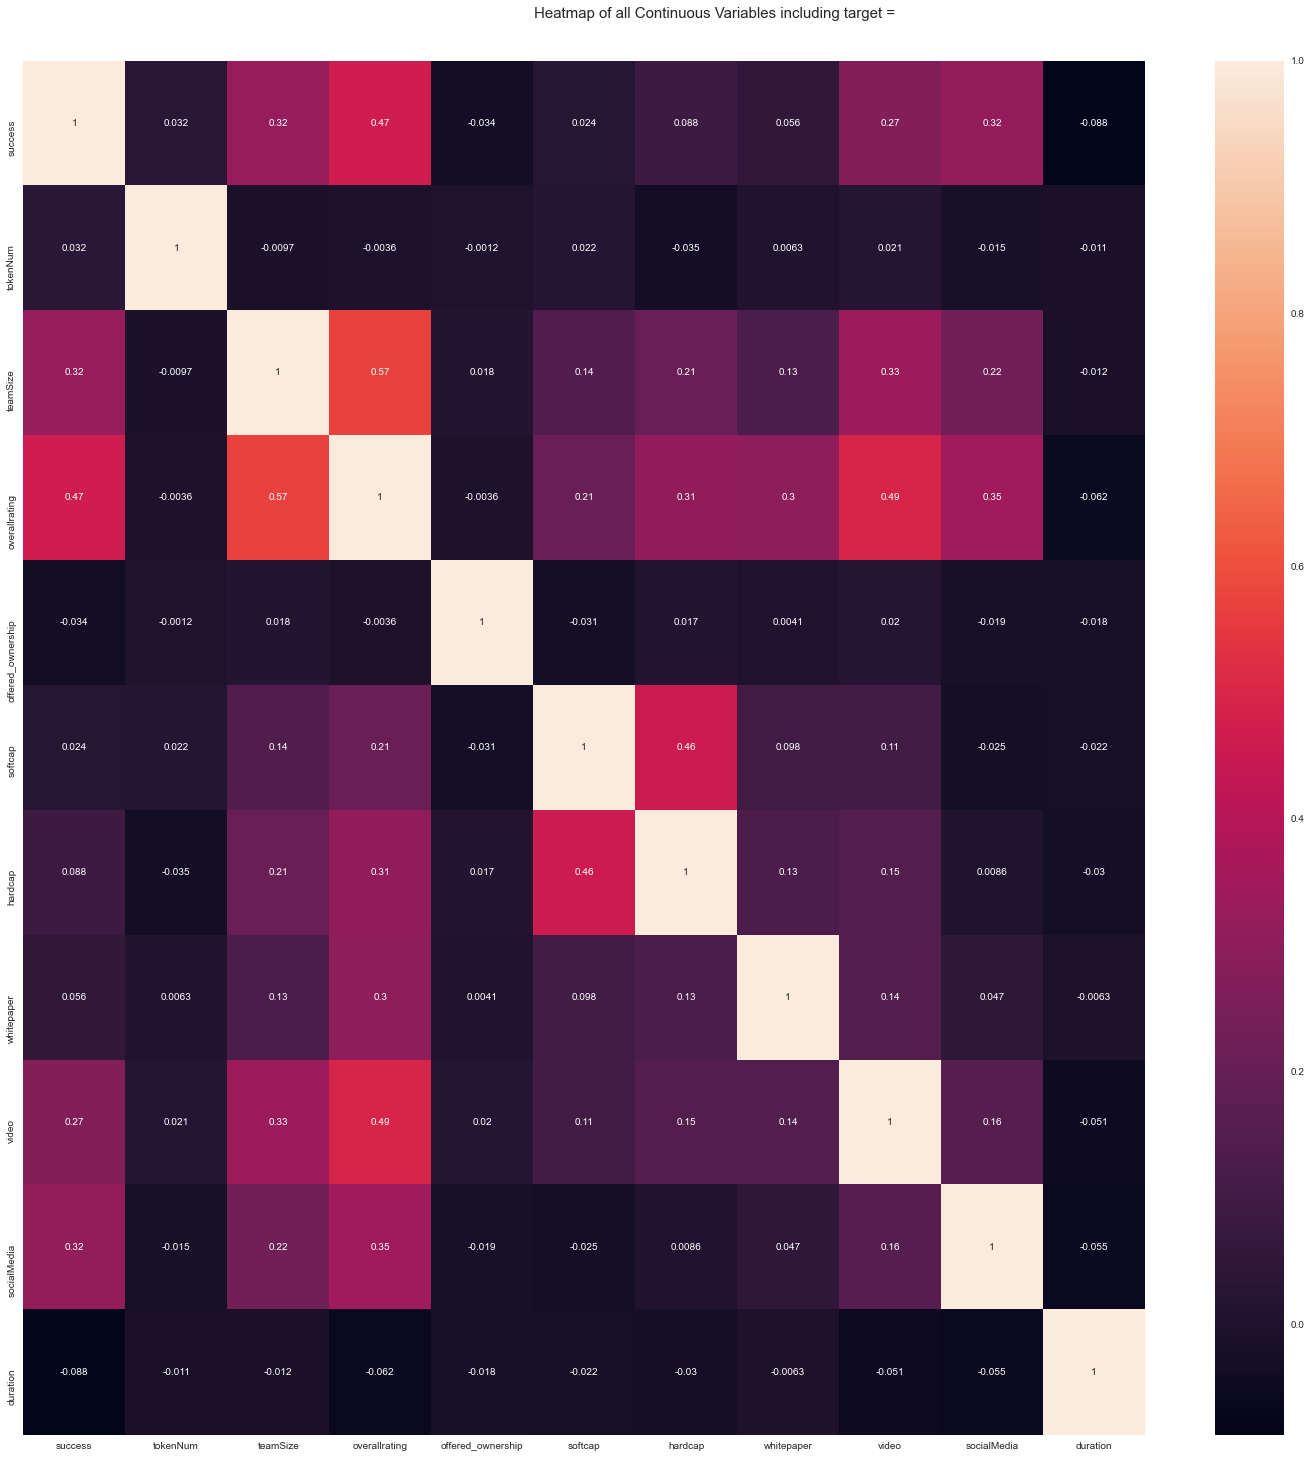

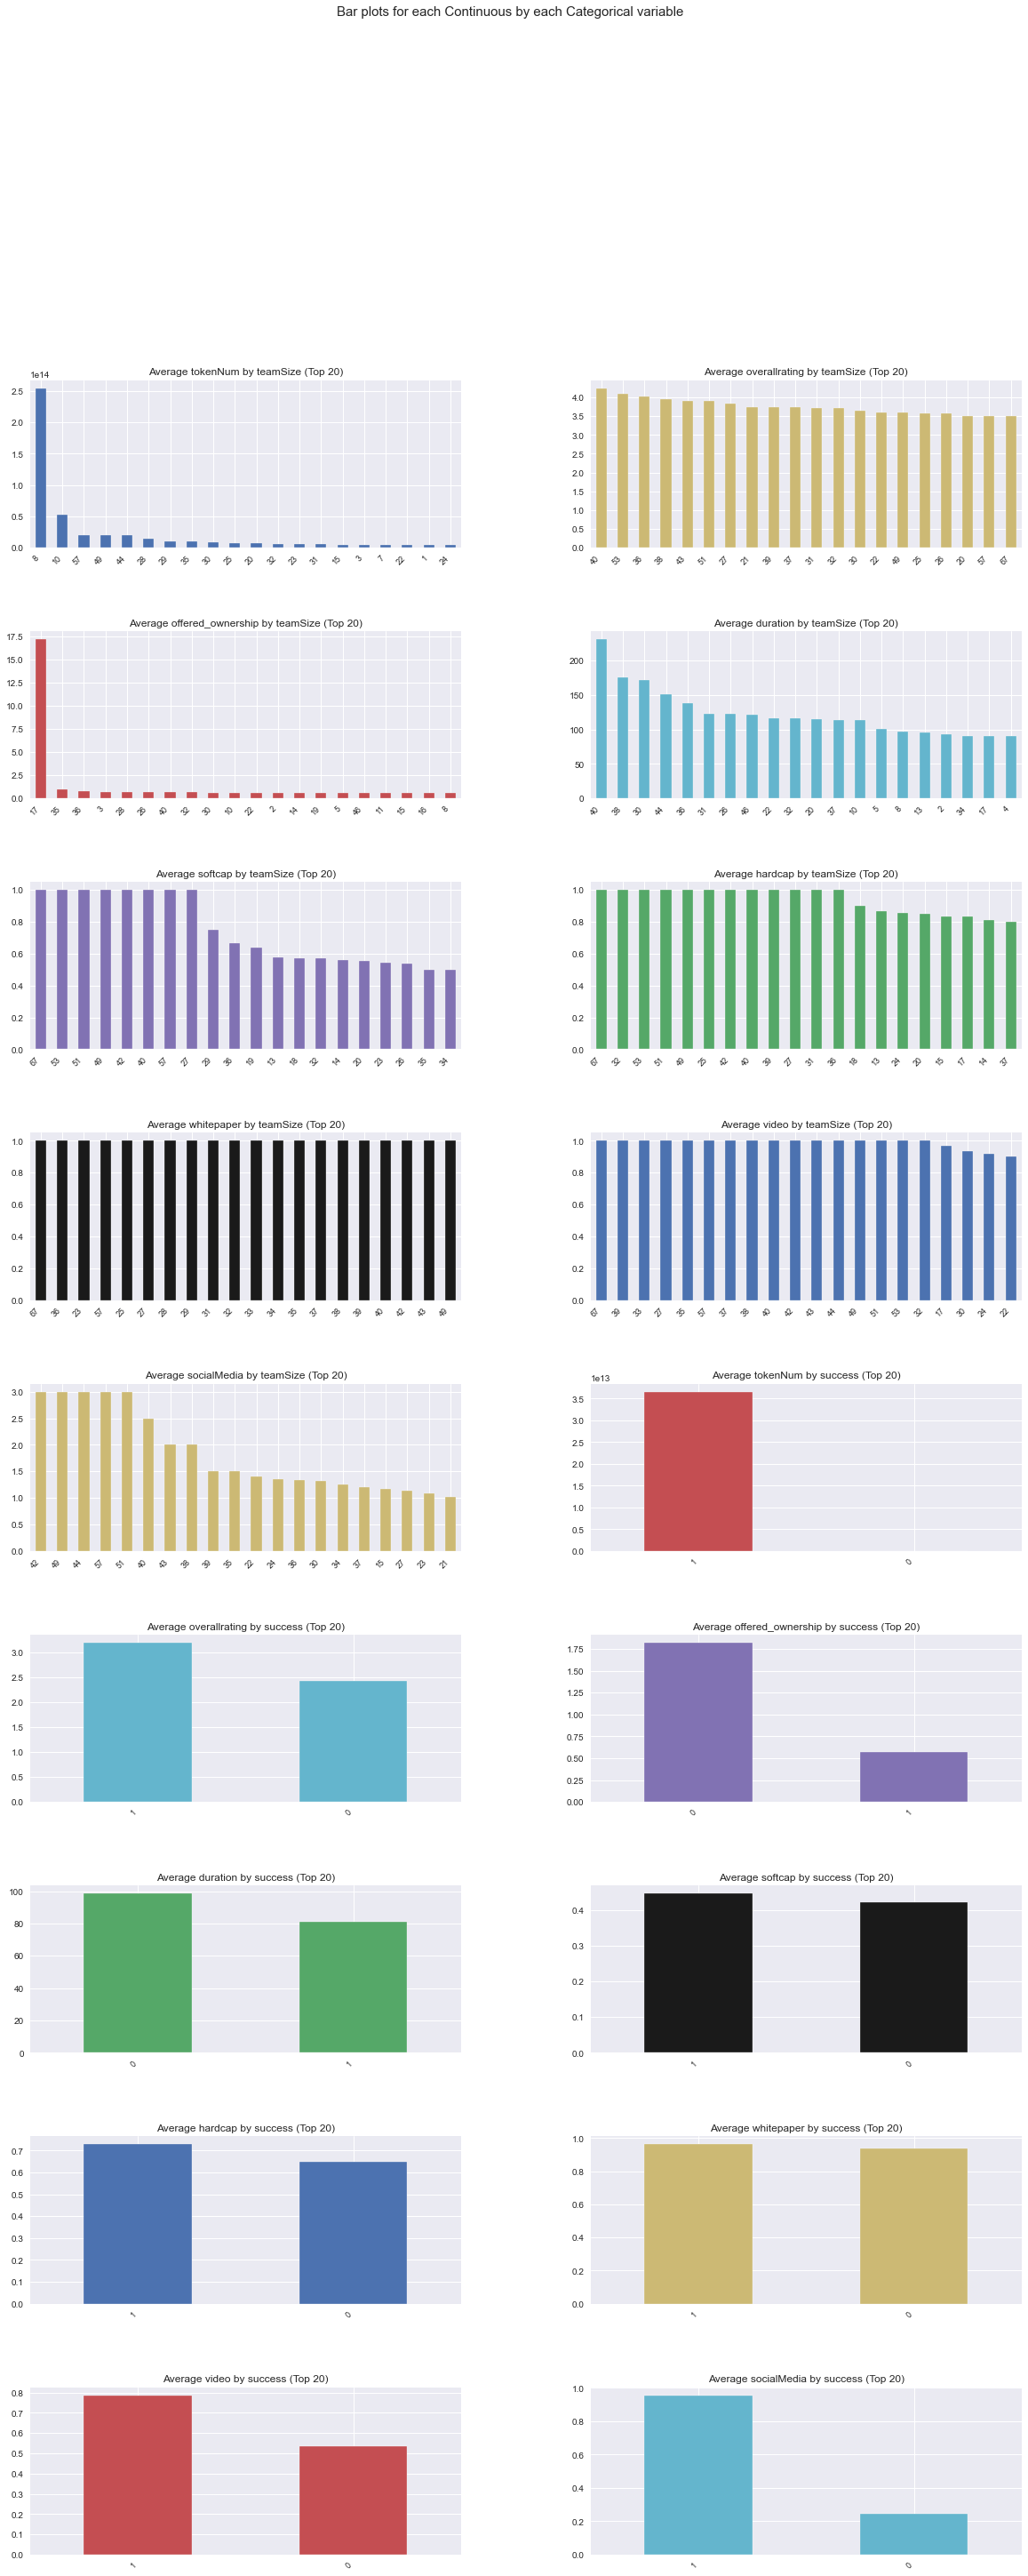

Time to run AutoViz (in seconds) = 9.090

 ###################### VISUALIZATION Completed ########################


In [109]:
 from autoviz.AutoViz_Class import AutoViz_Class
 AV = AutoViz_Class()
 df = AV.AutoViz('cleaned_data.csv')

Shape of your Data Set loaded: (1606, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        This does not include the Target column(s)
        6 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


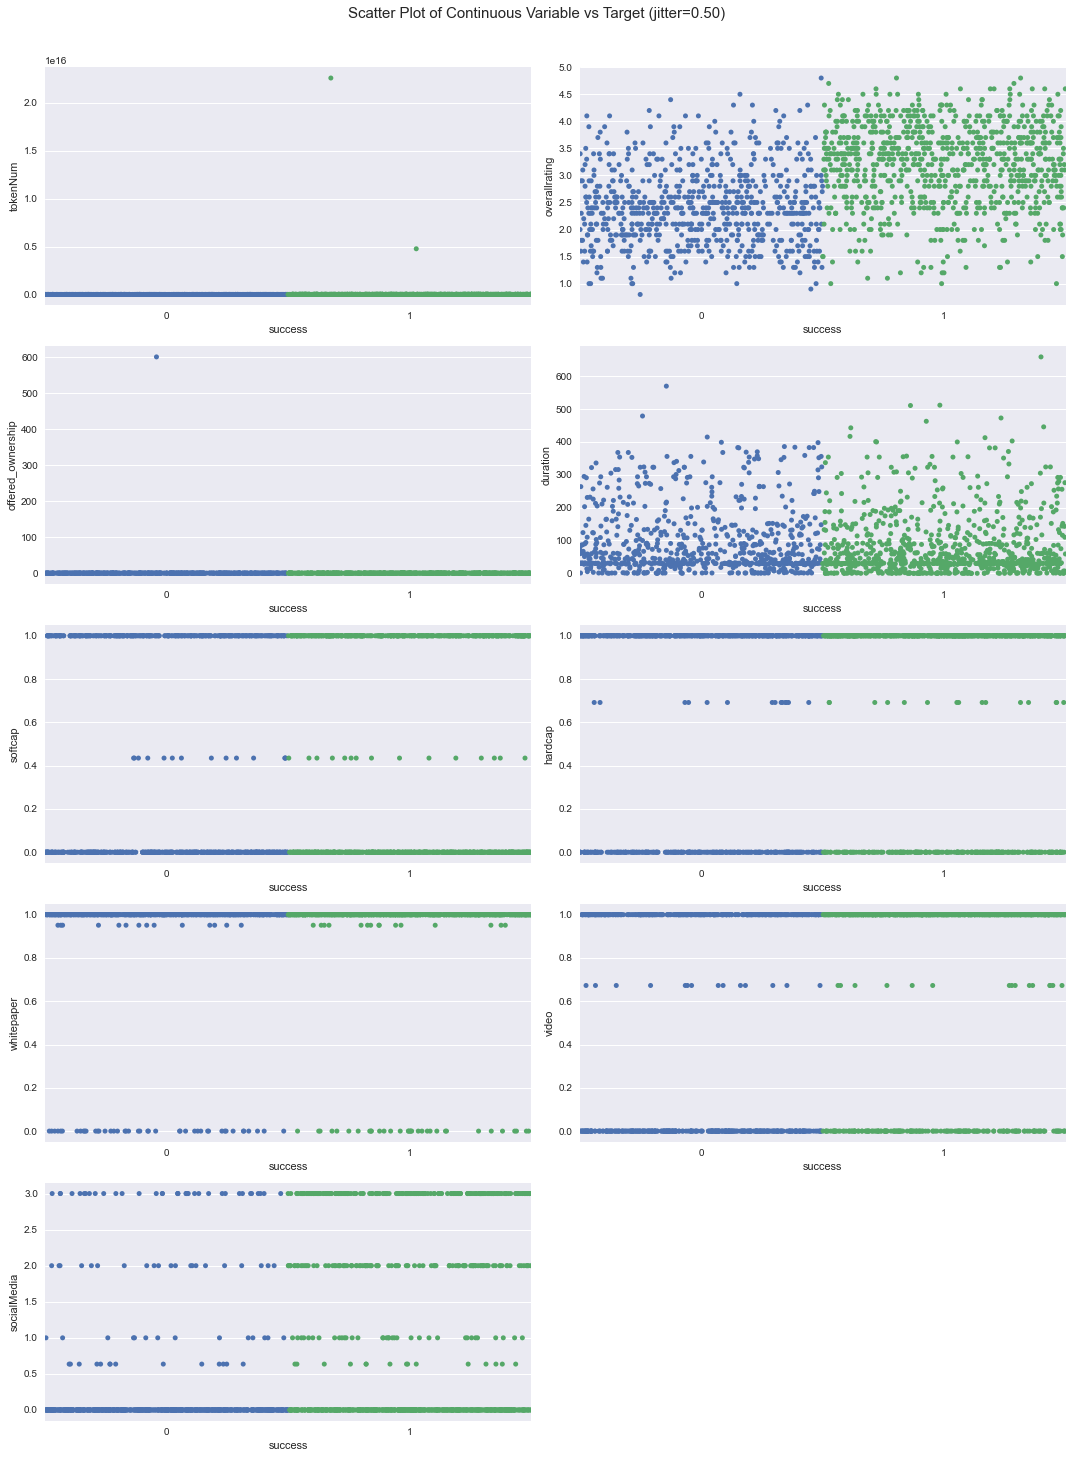

Total Number of Scatter Plots = 45


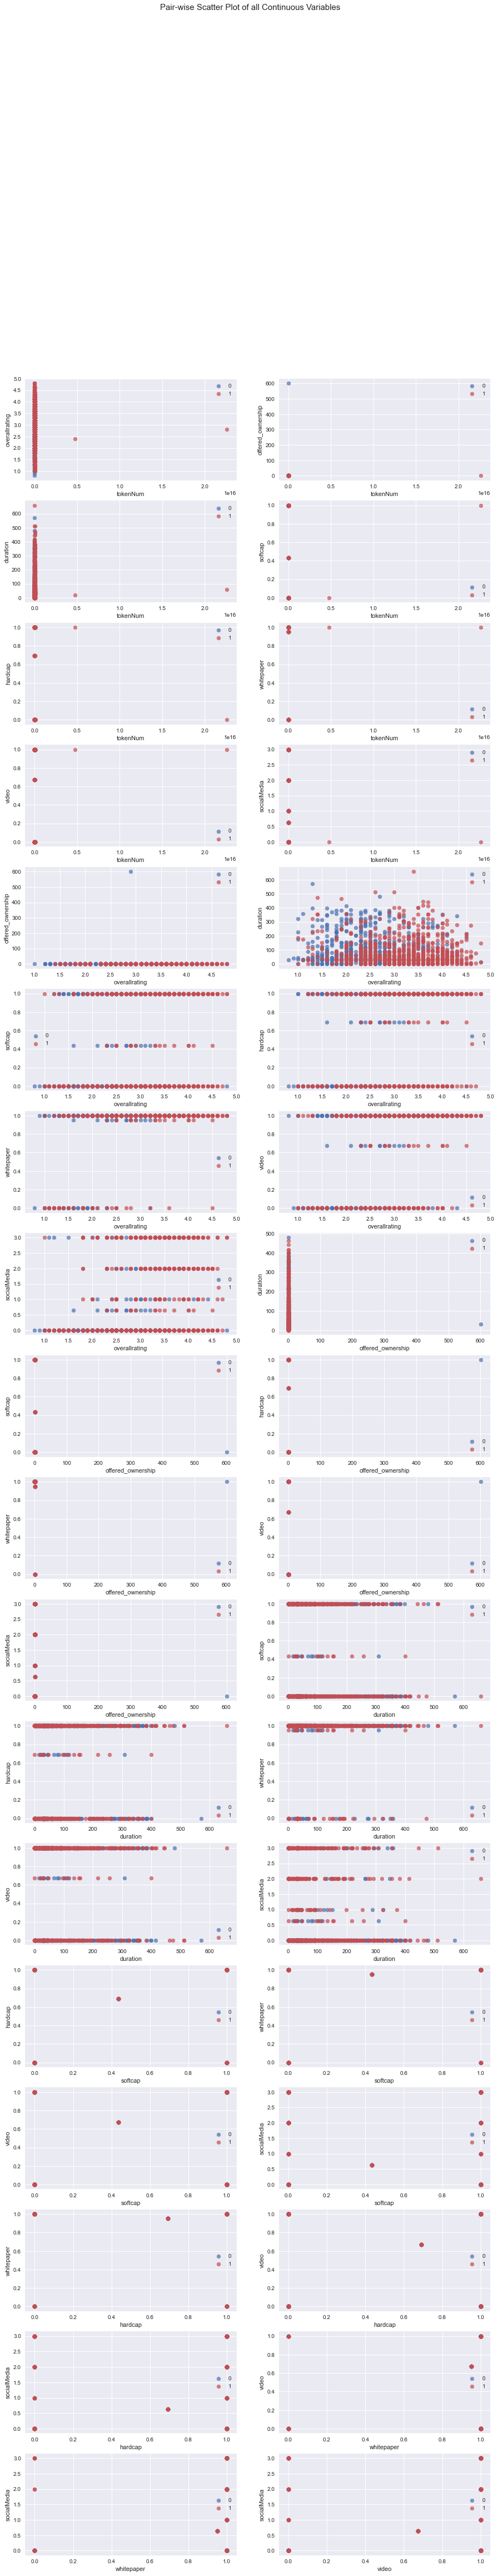

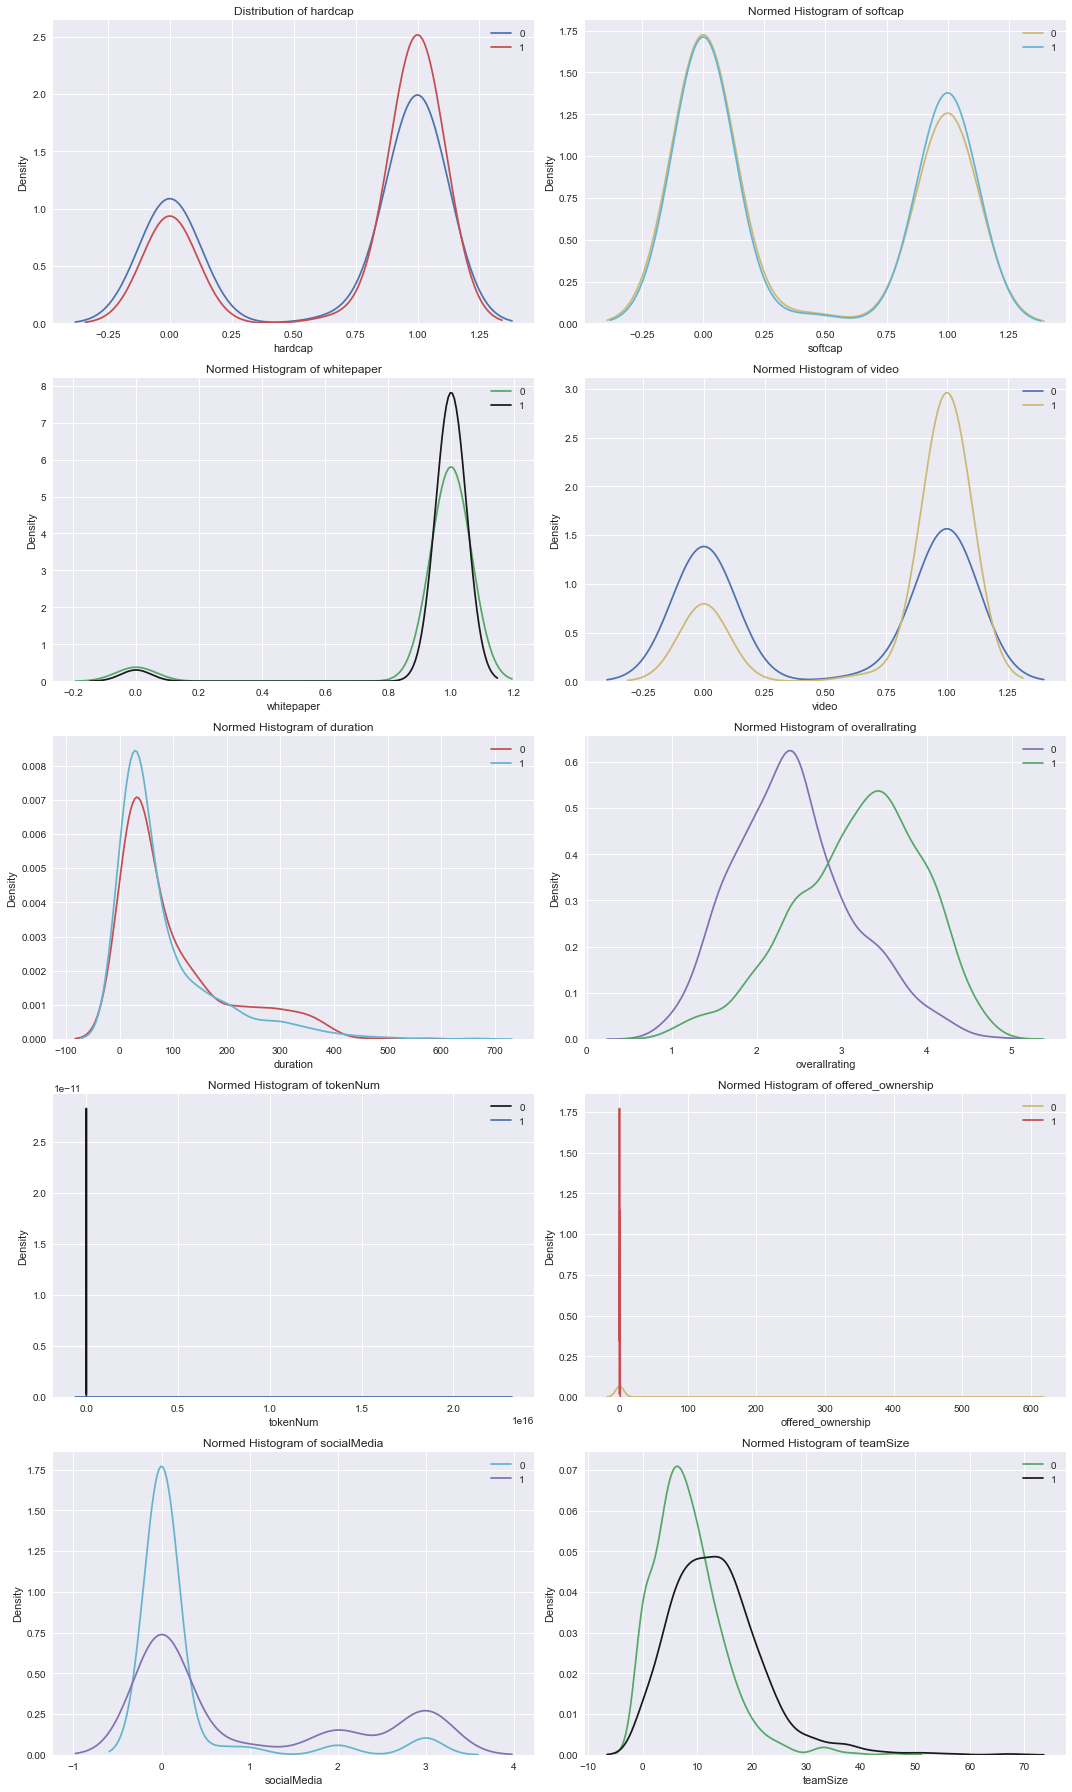

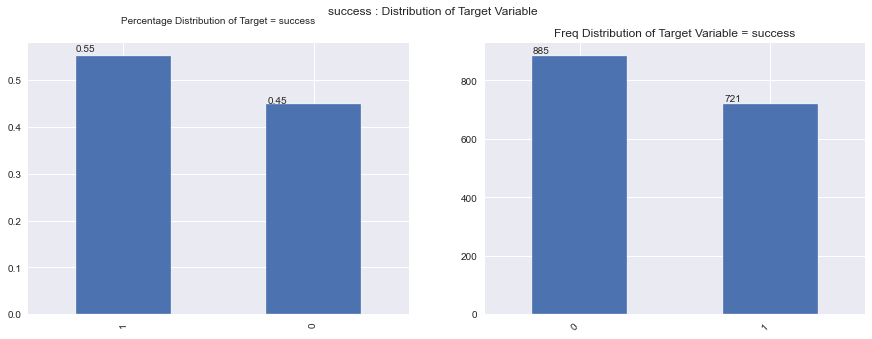

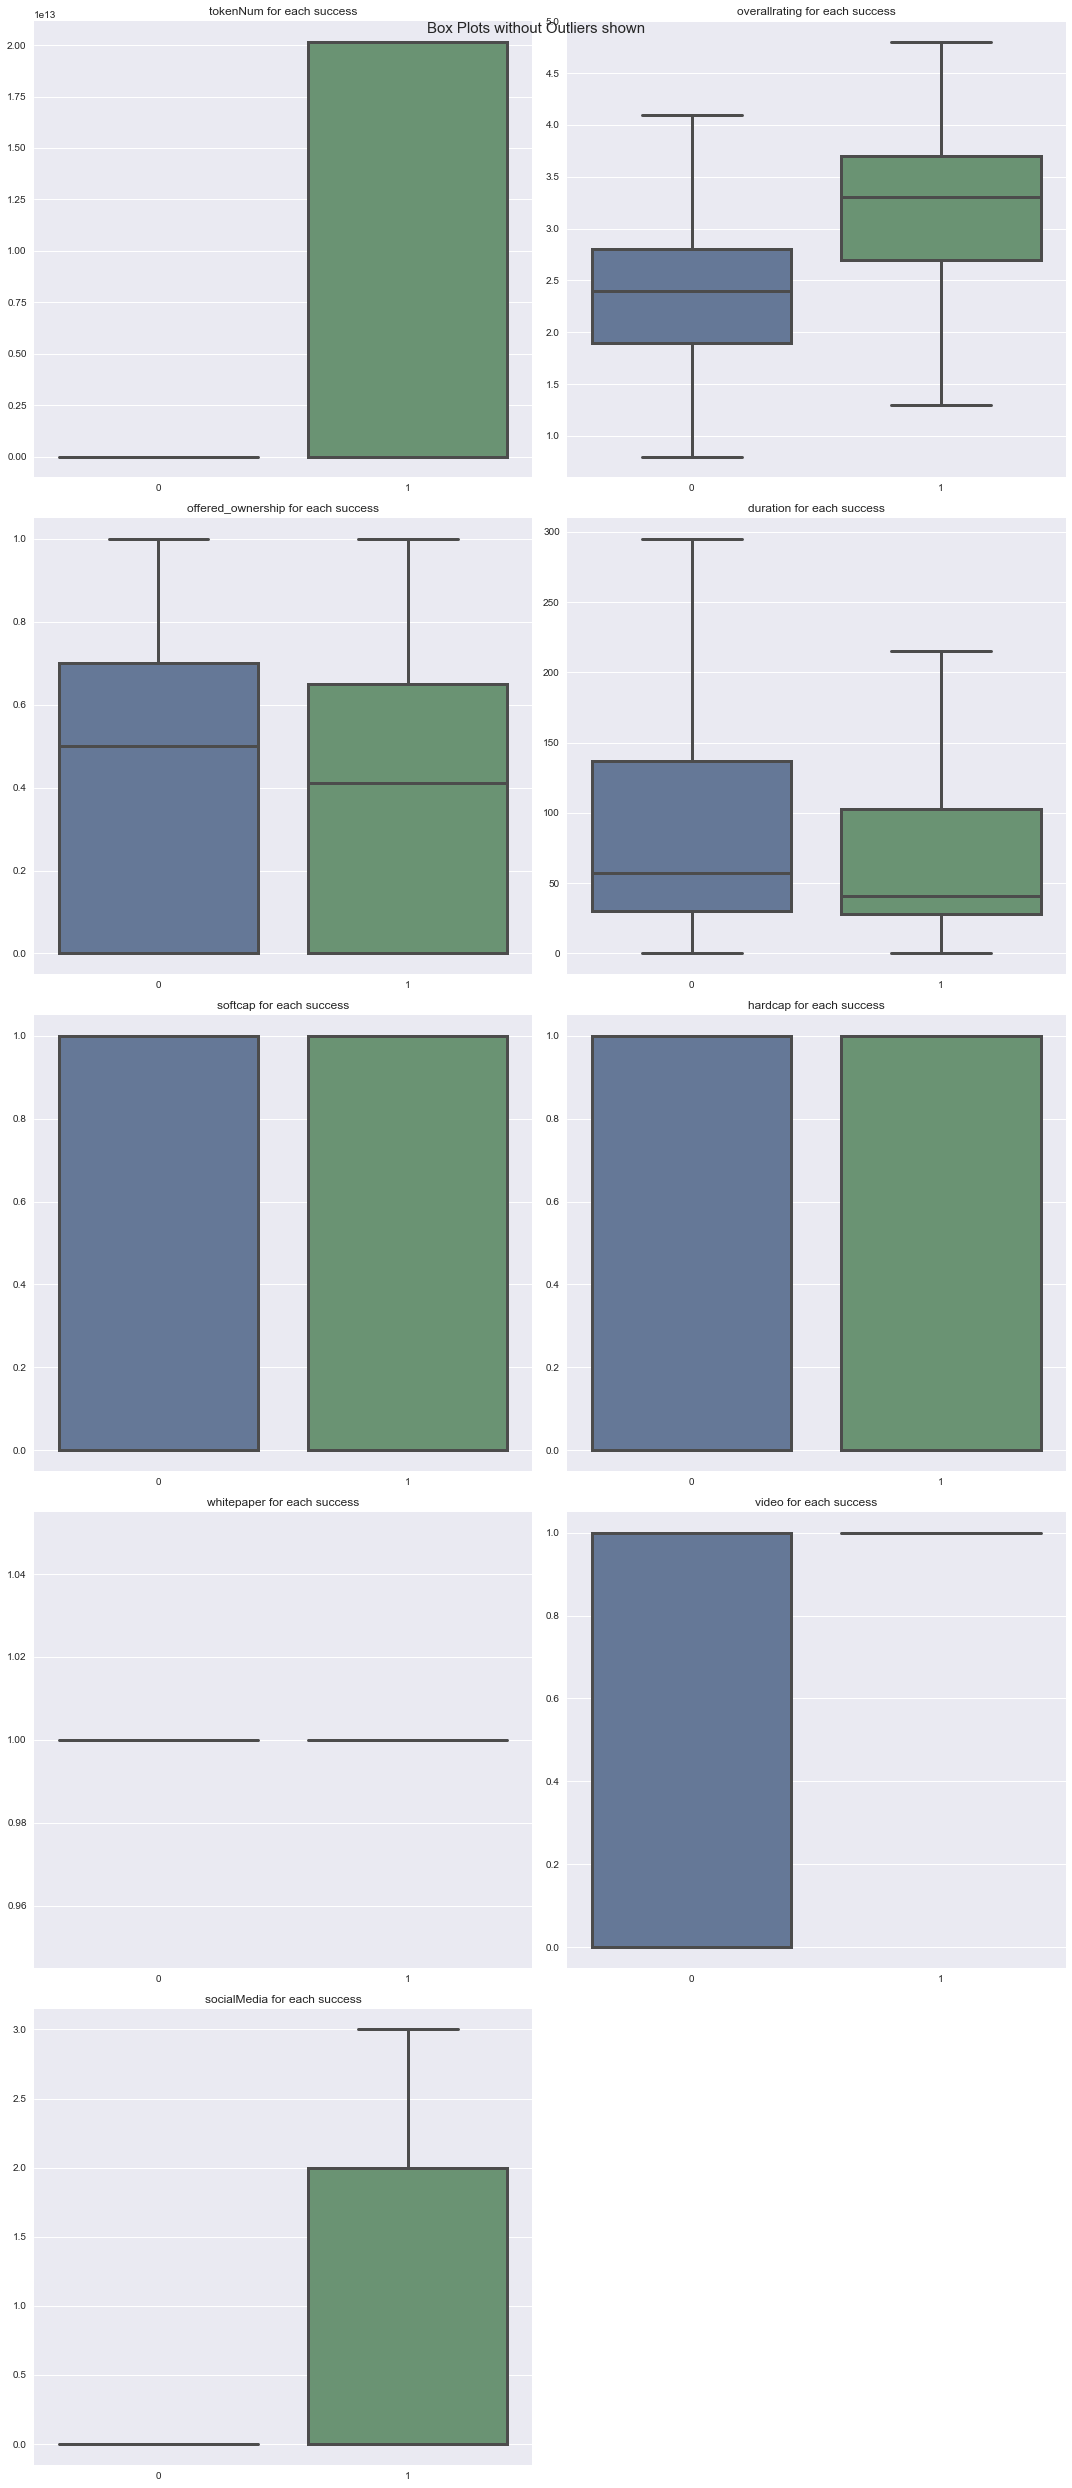

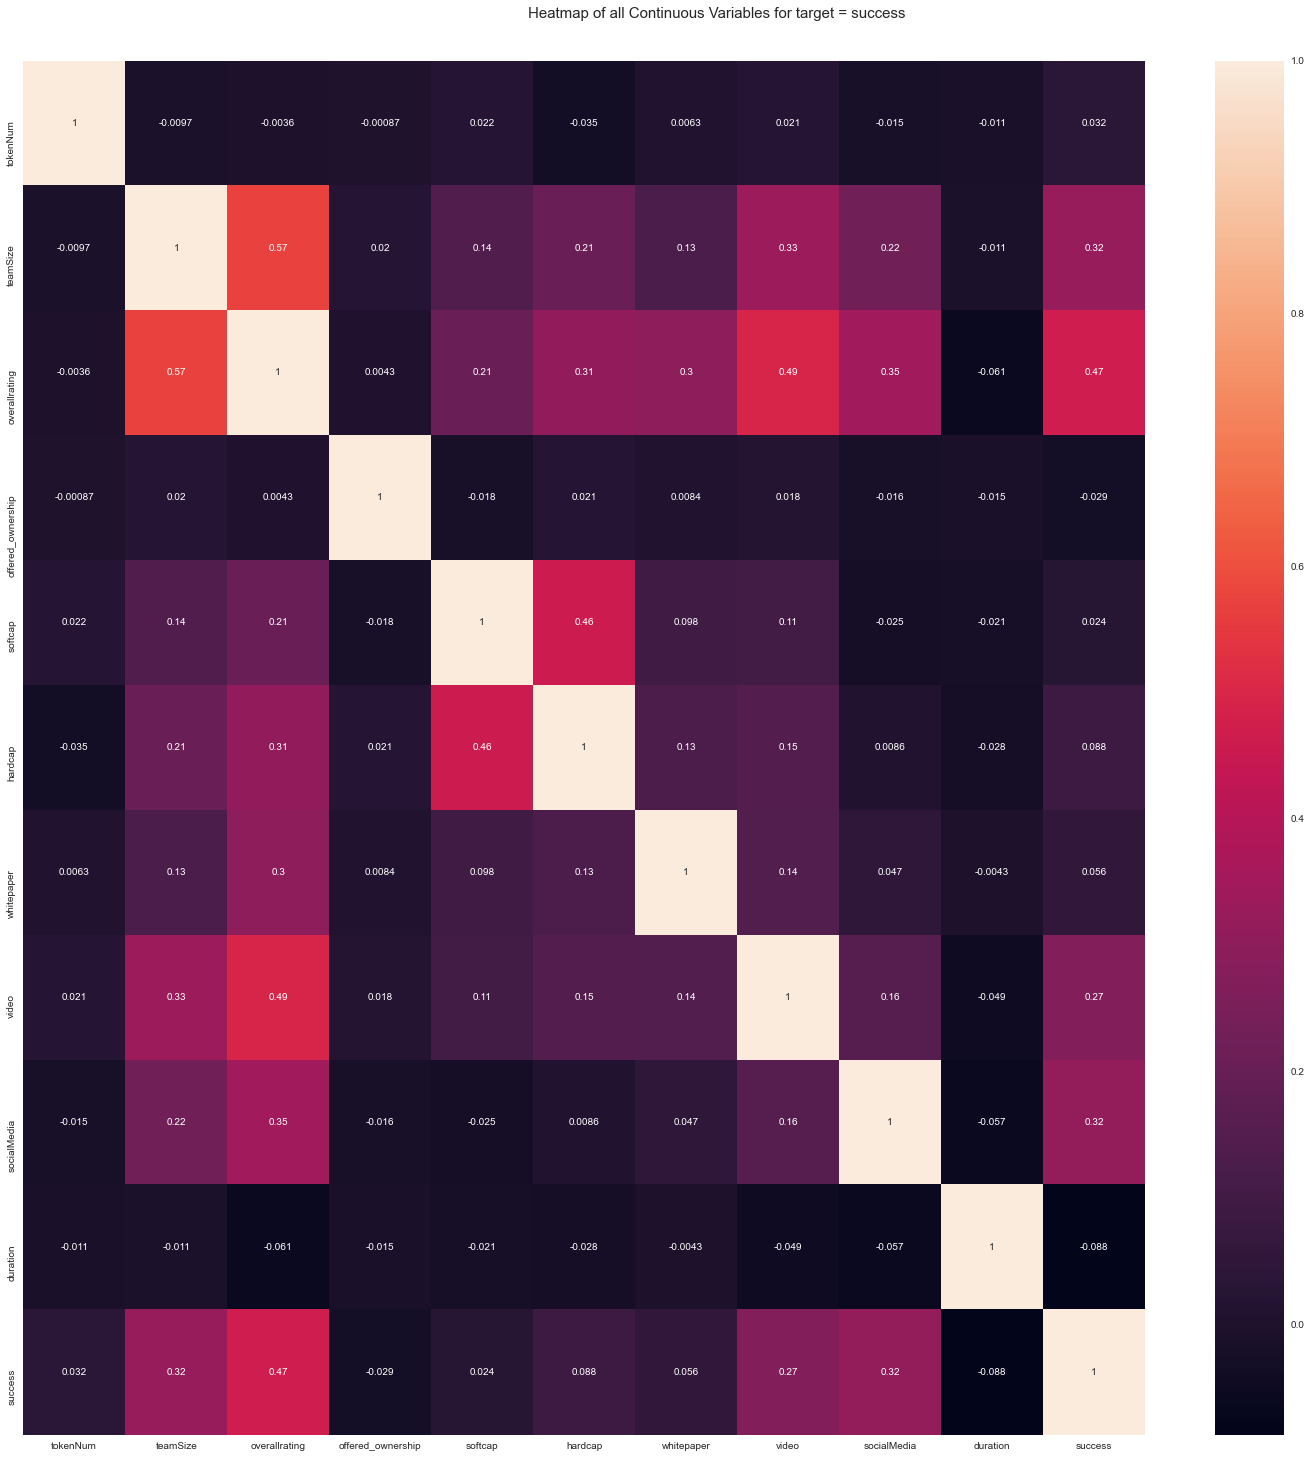

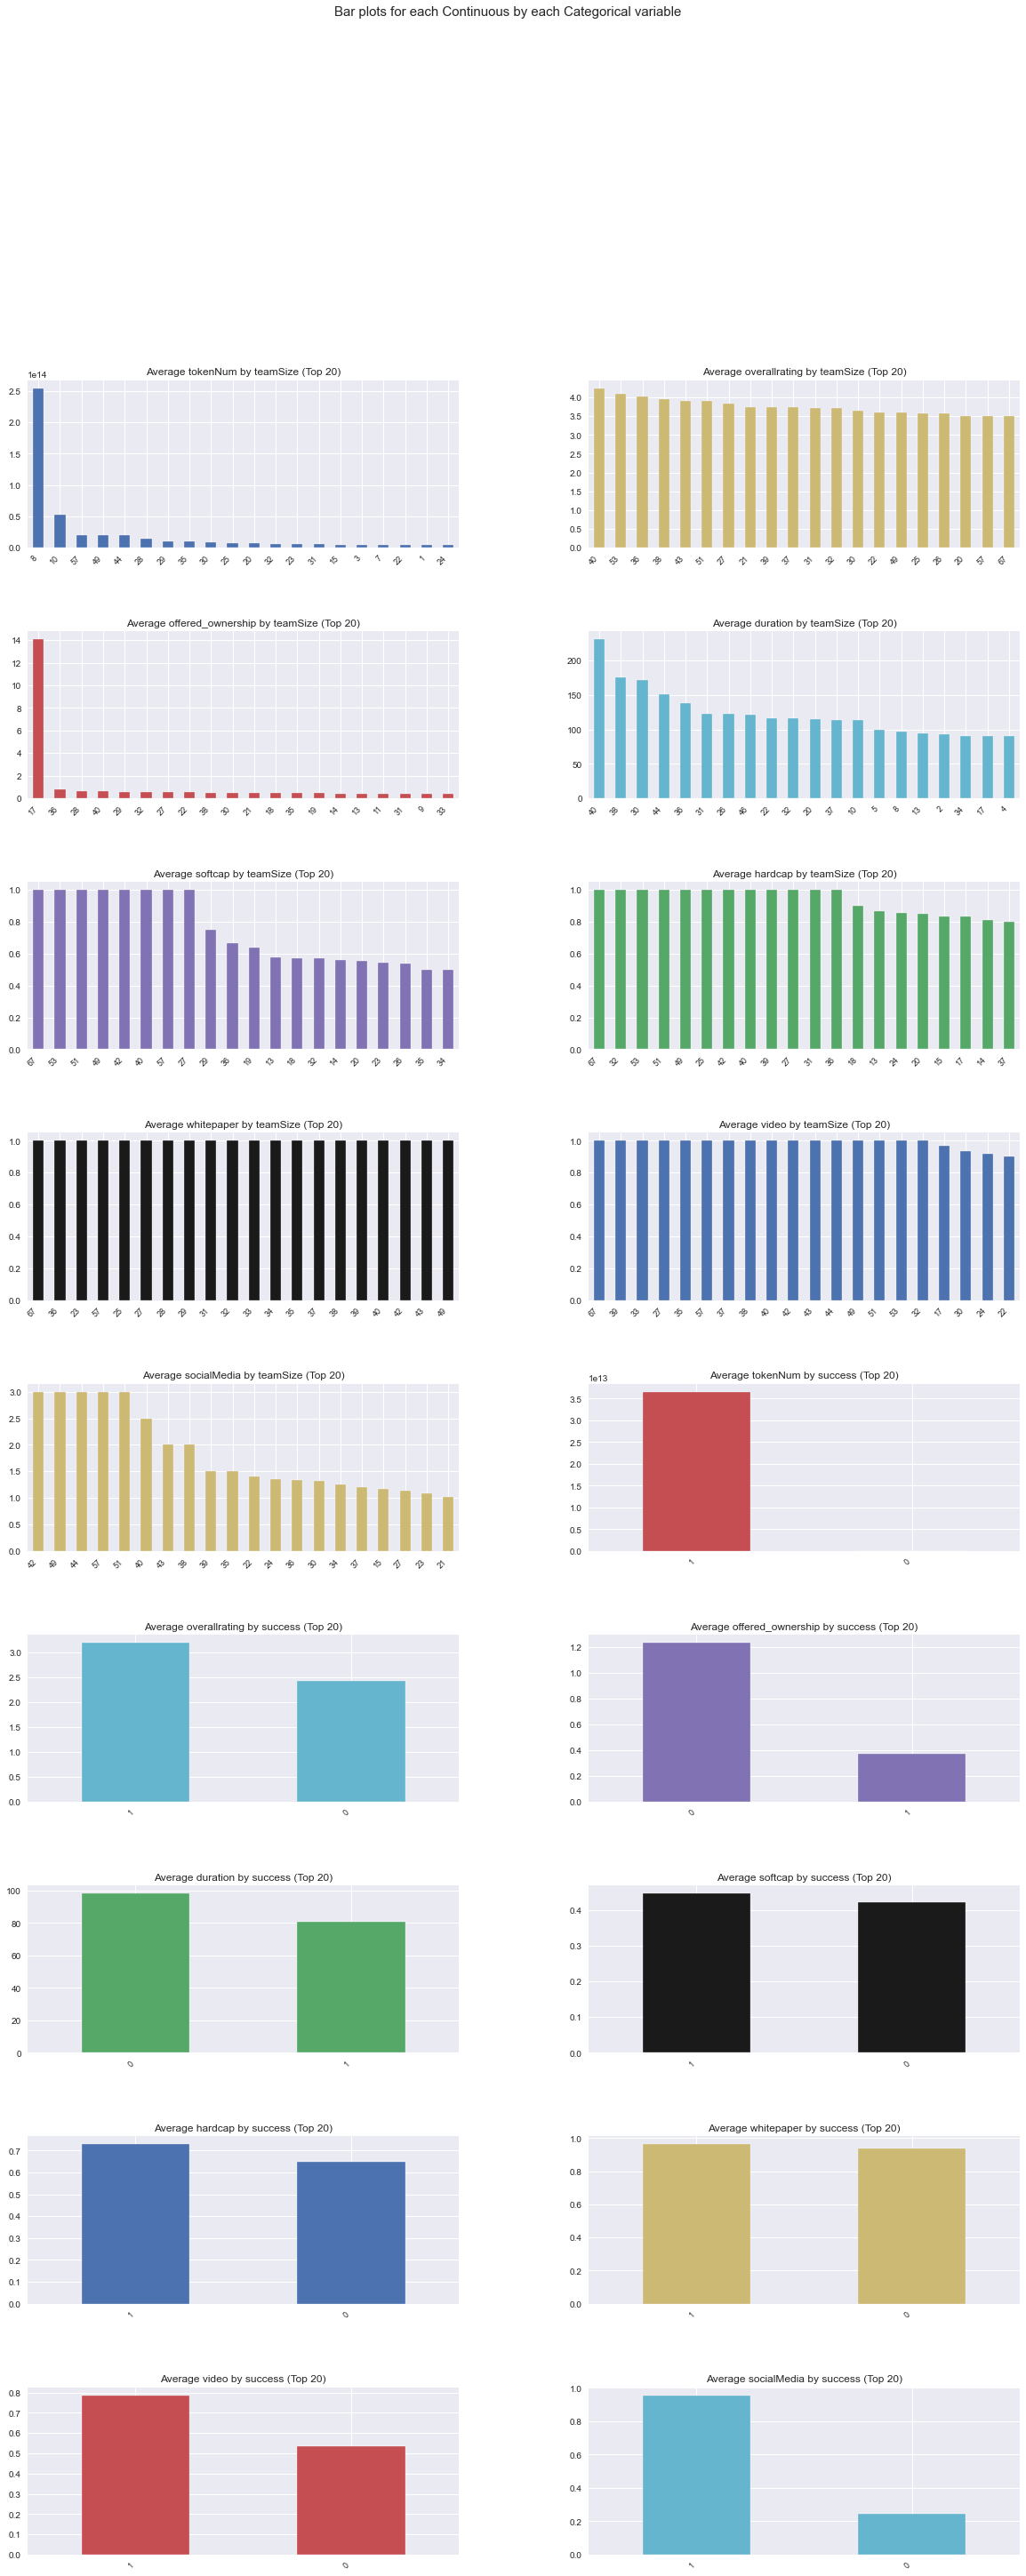

Time to run AutoViz (in seconds) = 9.286

 ###################### VISUALIZATION Completed ########################


In [110]:
 from autoviz.AutoViz_Class import AutoViz_Class
 AV = AutoViz_Class()
 df = AV.AutoViz('cleaned_data.csv',depVar='success')

In [111]:
data=data.drop(['offered_ownership','duration'],axis=1)

In [112]:
data=data.drop(['startdate','enddate'],axis=1)

In [113]:
data.dtypes

success                int64
tokenNum             float64
teamSize               int64
country               object
categories            object
overallrating        float64
platform              object
acceptingCurrency     object
softcap              float64
hardcap              float64
whitepaper           float64
video                float64
socialMedia          float64
dtype: object

In [114]:
data = pd.concat([data.drop('categories', 1), data['categories'].str.get_dummies(sep=",")], 1)
data

,success,tokenNum,teamSize,country,overallrating,platform,acceptingCurrency,softcap,hardcap,whitepaper,...,Media,Other,Platform,Real estate,Retail,Smart Contract,Software,Sports,Tourism,Virtual Reality
0,0,1.275000e+07,14,Estonia,2.6,Ethereum,ETH,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.000000e+00,13,Singapore,2.1,NaN,ETH,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.220000e+09,9,Singapore,2.5,Ethereum,NaN,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,0,4.000000e+07,0,USA,1.5,Ethereum,"ETH, BTC, LTC",1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,1,4.500000e+07,7,Mexico,2.1,Ethereum,"ETH , BTC",1.0,1.0,1.0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0,3.000000e+08,14,Marshall Islands,2.7,Ethereum,ETH,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1602,0,1.700000e+07,9,Germany,2.3,Ethereum,ETH,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
1603,0,6.500000e+08,10,Estonia,2.9,Ethereum,"ETH, BTC, LTC, BCH",0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
1604,0,0.000000e+00,7,Singapore,2.1,NaN,NaN,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
data = pd.concat([data.drop('acceptingCurrency', 1), data['acceptingCurrency'].str.get_dummies(sep=",")], 1)
data

,success,tokenNum,teamSize,country,overallrating,platform,softcap,hardcap,whitepaper,video,...,LTC,NEO,QTUM,USD,VET,Various,WAVES,XEM,XLM,ЕТН
0,0,1.275000e+07,14,Estonia,2.6,Ethereum,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000e+00,13,Singapore,2.1,NaN,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.220000e+09,9,Singapore,2.5,Ethereum,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.000000e+07,0,USA,1.5,Ethereum,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.500000e+07,7,Mexico,2.1,Ethereum,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0,3.000000e+08,14,Marshall Islands,2.7,Ethereum,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1602,0,1.700000e+07,9,Germany,2.3,Ethereum,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1603,0,6.500000e+08,10,Estonia,2.9,Ethereum,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0.000000e+00,7,Singapore,2.1,NaN,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
data = pd.concat([data.drop('platform', 1), data['platform'].str.get_dummies(sep=",")], 1)
data

,success,tokenNum,teamSize,country,overallrating,softcap,hardcap,whitepaper,video,socialMedia,...,Tendermint,ThePower,UNIVERSA,VASYA,VeChain,WAVES,Waves,X11,iOlite Blockchain,x13
0,0,1.275000e+07,14,Estonia,2.6,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000e+00,13,Singapore,2.1,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.220000e+09,9,Singapore,2.5,1.0,1.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.000000e+07,0,USA,1.5,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.500000e+07,7,Mexico,2.1,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0,3.000000e+08,14,Marshall Islands,2.7,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1602,0,1.700000e+07,9,Germany,2.3,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1603,0,6.500000e+08,10,Estonia,2.9,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0.000000e+00,7,Singapore,2.1,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
data['country'] = data['country'].astype('category')
data['country'] = data['country'].cat.codes

Clean Data

In [118]:
data

,success,tokenNum,teamSize,country,overallrating,softcap,hardcap,whitepaper,video,socialMedia,...,Tendermint,ThePower,UNIVERSA,VASYA,VeChain,WAVES,Waves,X11,iOlite Blockchain,x13
0,0,1.275000e+07,14,29,2.6,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000e+00,13,89,2.1,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.220000e+09,9,89,2.5,1.0,1.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.000000e+07,0,103,1.5,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.500000e+07,7,63,2.1,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0,3.000000e+08,14,61,2.7,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1602,0,1.700000e+07,9,33,2.3,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1603,0,6.500000e+08,10,29,2.9,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0.000000e+00,7,89,2.1,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
data.columns[data.isna().any()].tolist()

[]

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X=data.drop('success',axis=1)
y=data.success

In [122]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1601    0
1602    0
1603    0
1604    0
1605    0
Name: success, Length: 1606, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state =123)


In [124]:
X_train.head()

,tokenNum,teamSize,country,overallrating,softcap,hardcap,whitepaper,video,socialMedia,Art,...,Tendermint,ThePower,UNIVERSA,VASYA,VeChain,WAVES,Waves,X11,iOlite Blockchain,x13
671,6.500000e+07,5,105,1.9,0.0,1.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1158,8.000000e+07,12,60,3.0,1.0,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
374,3.500000e+06,11,103,3.2,0.0,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1119,2.015268e+13,0,94,2.0,0.0,0.0,1.0,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1446,7.000000e+05,5,57,2.9,1.0,1.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


Scaling data

In [125]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)


In [126]:
X_test_std=sc.transform(X_test)

Testing various models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train_std,y_train)
y_test_pred=lr.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7240663900414938


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std,y_train)
y_test_pred=neigh.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.6307053941908713


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_std,y_train)
y_test_pred=clf.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7344398340248963


In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
y_test_pred=dt.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7178423236514523


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_std,y_train)
y_test_pred=rf.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7572614107883817


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada, X_train_std, y_train, cv=5)
print(scores.mean())

ada.fit(X_train_std,y_train)
y_test_pred=ada.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7758055555555555
0.7593360995850622


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gboost.fit(X_train_std,y_train)
y_test_pred=gboost.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7593360995850622


In [ ]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train_std,y_train)
y_test_pred=xgb.predict(X_test_std)
print(accuracy_score(y_test_pred,y_test))

0.7925311203319502


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "xgboost":XGBClassifier()
}

Printing cross validation scores

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_std,y_train)
    training_score = cross_val_score(classifier, X_train_std, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 71.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 63.0 % accuracy score
Classifiers:  SVC Has a training score of 71.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 74.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 80.0 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 77.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 79.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 81.0 % accuracy score


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

log_reg_score = cross_val_score(lr, X_train_std, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(neigh, X_train_std, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(clf, X_train_std, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(dt, X_train_std, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

ranforest_score = cross_val_score(rf, X_train_std, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(ranforest_score.mean() * 100, 2).astype(str) + '%')

ada_score = cross_val_score(ada, X_train_std, y_train, cv=5)
print('AdaBoost Classifier Cross Validation Score', round(ada_score.mean() * 100, 2).astype(str) + '%')

gboost_score = cross_val_score(gboost, X_train_std, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score', round(gboost_score.mean() * 100, 2).astype(str) + '%')

xgb_score = cross_val_score(xgb, X_train_std, y_train, cv=5)
print('XGB Classifier Cross Validation Score', round(xgb_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  70.82%
Knears Neighbors Cross Validation Score 61.21%
Support Vector Classifier Cross Validation Score 70.73%
DecisionTree Classifier Cross Validation Score 73.4%
RandomForest Classifier Cross Validation Score 76.87%
AdaBoost Classifier Cross Validation Score 77.58%
Gradient Boosting Classifier Cross Validation Score 77.94%
XGB Classifier Cross Validation Score 79.63%


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(lr, X_train_std, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(neigh, X_train_std, y_train, cv=5)

svc_pred = cross_val_predict(clf, X_train_std, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(dt, X_train_std, y_train, cv=5)

ranforest_pred=cross_val_predict(rf, X_train_std, y_train, cv=5)

ada_pred=cross_val_predict(ada, X_train_std, y_train, cv=5)

grad_pred=cross_val_predict(gboost, X_train_std, y_train, cv=5)

xgrad_pred=cross_val_predict(xgb, X_train_std, y_train, cv=5)


In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random forest Classifier: ', roc_auc_score(y_train, ranforest_pred))
print('Adaboost Classifier: ', roc_auc_score(y_train, ada_pred))
print('Gradient Boost Classifier: ', roc_auc_score(y_train, grad_pred))
print('XGB Classifier: ', roc_auc_score(y_train, xgrad_pred))

Logistic Regression:  0.7678479646791789
KNears Neighbors:  0.606762162282956
Support Vector Classifier:  0.7798003466956964
Decision Tree Classifier:  0.7228908547038561
Random forest Classifier:  0.7662693180693584
Adaboost Classifier:  0.7765440887745297
Gradient Boost Classifier:  0.7802951702033246
XGB Classifier:  0.7969324134936774


In [ ]:
import matplotlib.pyplot as plt

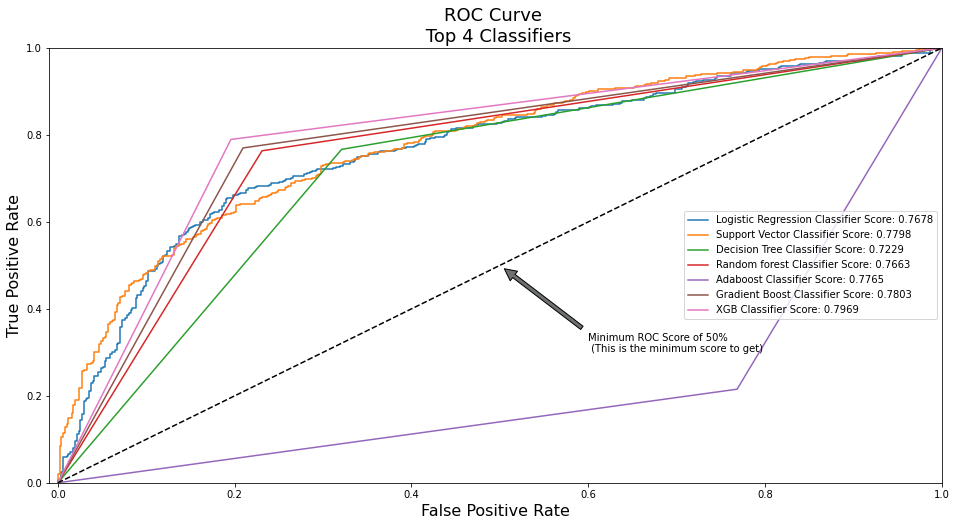

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
ranforest_fpr, ranforest_tpr, ranforest_threshold = roc_curve(y_train, ranforest_pred)
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_train, ada_pred)
grad_fpr, grad_tpr, grad_threshold = roc_curve(y_train, grad_pred)
xgrad_fpr, xgrad_tpr, xgrad_threshold = roc_curve(y_train, xgrad_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,ranforest_fpr, ranforest_tpr,ada_fpr, ada_tpr,grad_fpr, grad_tpr,xgrad_fpr, xgrad_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(ranforest_fpr, ranforest_tpr, label='Random forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ranforest_pred)))
    plt.plot(ada_fpr, ada_tpr, label='Adaboost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ada_pred)))
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, grad_pred)))
    plt.plot(xgrad_fpr, xgrad_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgrad_pred)))


    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,ranforest_fpr, ranforest_tpr,ada_tpr,ada_fpr,grad_fpr, grad_tpr,xgrad_fpr, xgrad_tpr)
plt.show()

In [ ]:
import seaborn as sns

[Text(0, 0.5, ''), Text(0, 1.5, '')]

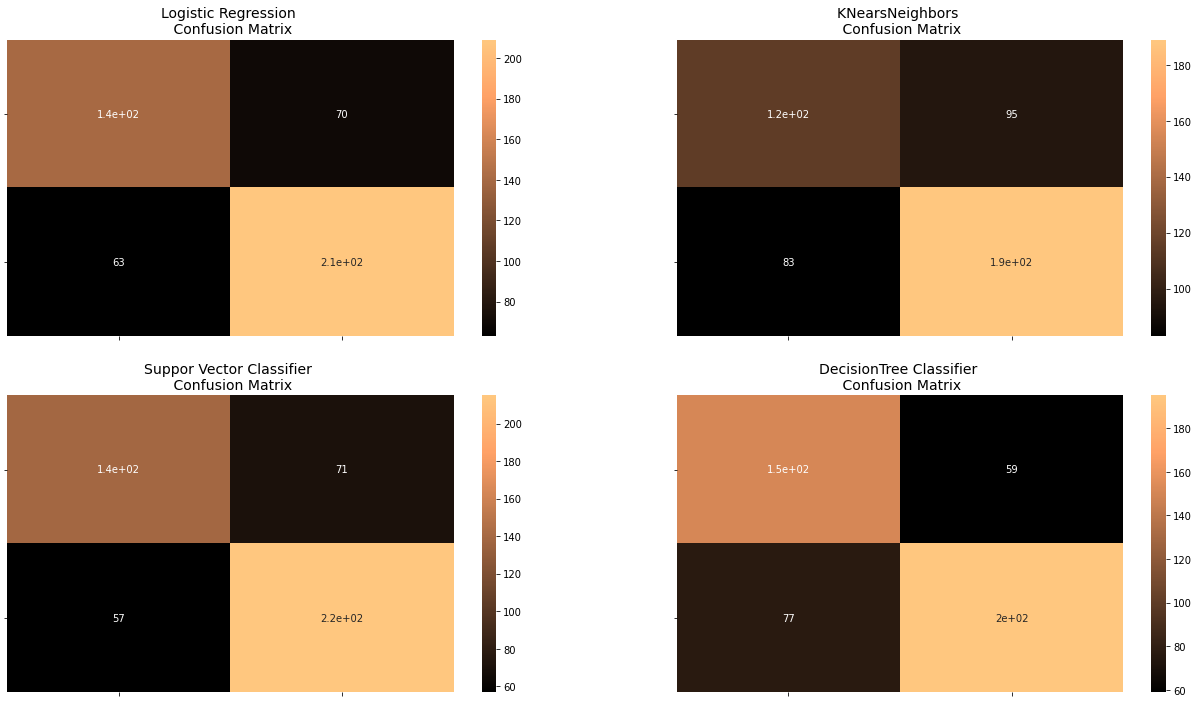

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = lr.predict(X_test_std)
y_pred_knear = neigh.predict(X_test_std)
y_pred_svc = clf.predict(X_test_std)
y_pred_tree = dt.predict(X_test_std)



log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

[Text(0, 0.5, ''), Text(0, 1.5, '')]

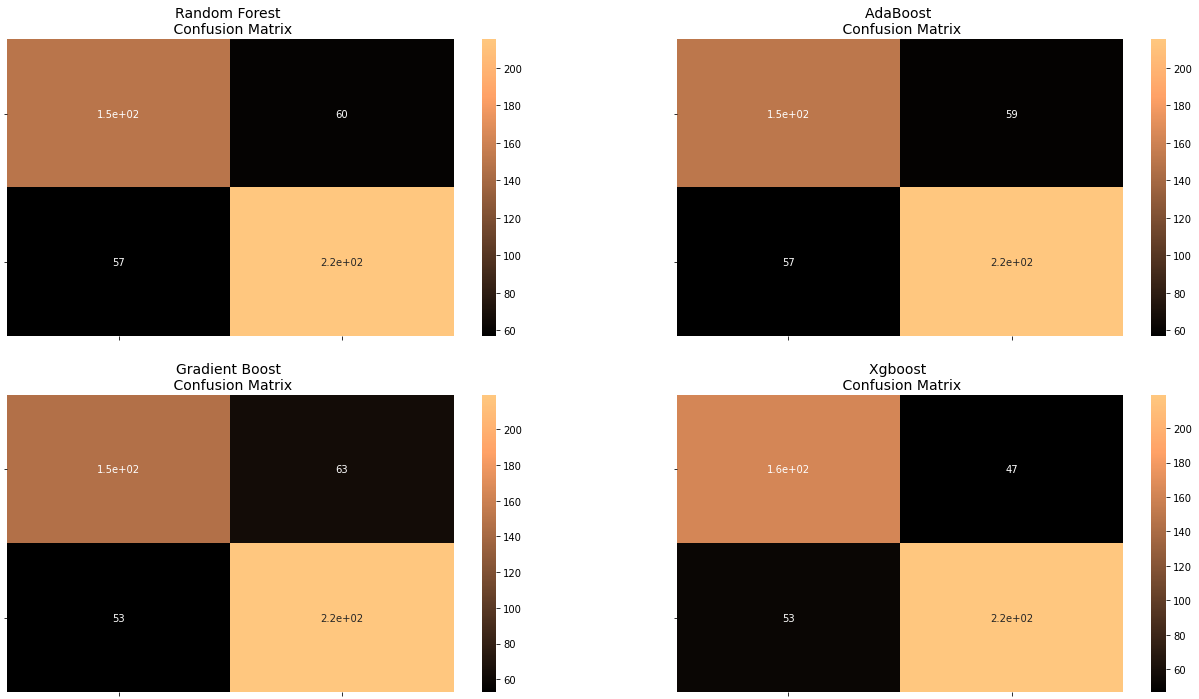

In [ ]:
y_pred_ranforest = rf.predict(X_test_std)
y_pred_ada = ada.predict(X_test_std)
y_pred_gboost = gboost.predict(X_test_std)
y_pred_xgb = xgb.predict(X_test_std)


ranforest_cf = confusion_matrix(y_test, y_pred_ranforest)
ada_cf = confusion_matrix(y_test, y_pred_ada)
gboost_cf = confusion_matrix(y_test, y_pred_gboost)
xgb_cf = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(ranforest_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(ada_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("AdaBoost \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gboost_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Gradient Boost \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Xgboost \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier')
print(classification_report(y_test, y_pred_ranforest))

print('Adaboost Classifier:')
print(classification_report(y_test, y_pred_ada))

print('Gradient Boost Classifier:')
print(classification_report(y_test, y_pred_gboost))

print('XGBosst Classifier:')
print(classification_report(y_test,y_pred_xgb))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       210
           1       0.75      0.77      0.76       272

    accuracy                           0.72       482
   macro avg       0.72      0.72      0.72       482
weighted avg       0.72      0.72      0.72       482

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       210
           1       0.67      0.69      0.68       272

    accuracy                           0.63       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.63      0.63      0.63       482

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       210
           1       0.75      0.79      0.77       272

    accuracy                           0.73       482
   macro avg       0.73      0.73      0.73       482
weighted

# Feature Importance Analysis

Model performance is further assessed using ROC curves and confusion matrices, with XGBoost emerging as the top performer. Feature importance analysis reveals key factors influencing ICO success, providing valuable insights for stakeholders.

# Conclusion

This analysis utilized machine learning models to predict ICO success, revealing that the XGBoost Classifier is the most accurate with a 79% accuracy rate. Other models like Gradient Boosting, Random Forest, and AdaBoost also performed well, achieving around 76% accuracy. Key factors influencing ICO success include project details, team size, token characteristics, and community engagement.

**Recommendations:**
- **For ICO Organizers:** Focus on critical success factors identified in the analysis to improve campaign outcomes.
- **For Investors:** Use the XGBoost Classifier and other robust models to guide investment decisions and assess ICO prospects effectively. 

Overall, machine learning provides valuable tools for predicting ICO success and optimizing investment strategies.